# Data Preprocessing

In [16]:
# Load dataset
import pandas as pd
attribute=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
             'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
train=pd.read_csv('adult.data.csv', names=attribute, header=None, na_values=' ?')
test=pd.read_csv('adult.test.csv', names=attribute, header=None, na_values=' ?')

print(train.shape)
print(test.shape)

# Drop education attributes
train=train.drop(columns=['education'])
test=test.drop(columns=['education'])
train.head(5)

(32561, 15)
(16281, 15)


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
# Replace missing values with most frequent values of a column
import numpy as np
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')
train1=imp.fit_transform(train)
test1=imp.fit_transform(test)

new_attributes=['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status', 'occupation', 'relationship', 
               'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

train1=pd.DataFrame(train1,columns=new_attributes)
test1=pd.DataFrame(test1,columns=new_attributes)

In [18]:
# Convert categorical variables to numeric variables
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
train1['workclass'] = encoder.fit_transform(train1['workclass'])
train1['marital-status'] = encoder.fit_transform(train1['marital-status'])
train1['occupation'] = encoder.fit_transform(train1['occupation'])
train1['relationship'] = encoder.fit_transform(train1['relationship'])
train1['race'] = encoder.fit_transform(train1['race'])
train1['sex'] = encoder.fit_transform(train1['sex'])
train1['native-country'] = encoder.fit_transform(train1['native-country'])
train1['income'] = encoder.fit_transform(train1['income'])

test1['workclass'] = encoder.fit_transform(test1['workclass'])
test1['marital-status'] = encoder.fit_transform(test1['marital-status'])
test1['occupation'] = encoder.fit_transform(test1['occupation'])
test1['relationship'] = encoder.fit_transform(test1['relationship'])
test1['race'] = encoder.fit_transform(test1['race'])
test1['sex'] = encoder.fit_transform(test1['sex'])
test1['native-country'] = encoder.fit_transform(test1['native-country'])
test1['income'] = encoder.fit_transform(test1['income'])

In [19]:
# Define the X and Y attributes before building model
X_train=train1.drop(columns=['income']) 
y_train=train1['income']
X_test=test1.drop(columns=['income']) 
y_test=test1['income']

# Decision Tree

In [25]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import time

# Determine when to stop splitting the tree
start=time.time()
S = []
for i in range(1,15):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    S.append(round(accuracy_score(y_test,y_pred),4))

finish=time.time()
print("Time taken to find the stopping node", finish-start)
print(S.index(max(S))+1)
print(max(S))

Time taken to find the stopping node 1.1600861549377441
7
0.8568


In [26]:
# Train the decision tree classification model using gini
start=time.time()
clf1=DecisionTreeClassifier(criterion="gini",max_depth=7)
clf1=clf1.fit(X_train,y_train)
finish=time.time()
y_pred1=clf1.predict(X_test)

accuracy1=metrics.accuracy_score(y_test, y_pred1)
confusion_matrix1=confusion_matrix(y_test,y_pred1)

print("Time taken to train the model", finish-start)
print("Accuracy:",accuracy1)
print(confusion_matrix1)
print(classification_report(y_test,y_pred1))

Time taken to train the model 0.10706424713134766
Accuracy: 0.8568883975185799
[[11902   533]
 [ 1797  2049]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12435
           1       0.79      0.53      0.64      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.74      0.77     16281
weighted avg       0.85      0.86      0.85     16281



In [30]:
# Train the decision tree classification model using entropy

start=time.time()
clf2=DecisionTreeClassifier(criterion="entropy",max_depth=7)
clf2=clf2.fit(X_train,y_train)
finish=time.time()
y_pred2=clf2.predict(X_test)

accuracy2=metrics.accuracy_score(y_test, y_pred2)
confusion_matrix2=confusion_matrix(y_test,y_pred2)

print("Time taken to train the model", finish-start)
print("Accuracy:",accuracy2)
print(confusion_matrix2)
print(classification_report(y_test,y_pred2))

Time taken to train the model 0.11969280242919922
Accuracy: 0.8543087033965973
[[11815   620]
 [ 1752  2094]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12435
           1       0.77      0.54      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.82      0.75      0.77     16281
weighted avg       0.85      0.85      0.84     16281



In [31]:
# Compute confidence interval for the accuracy
import scipy.stats

confidence=0.95
z_value=scipy.stats.norm.ppf((1+confidence)/2.0)
accuracy=max(accuracy1,accuracy2)
ci_length=z_value*np.sqrt((accuracy*(1-accuracy))/y_test.shape[0])
ci_lower=accuracy-ci_length
ci_upper=accuracy+ci_length

print(ci_lower, ci_upper)

0.8515093286274213 0.8622674664097385


# Nearest Neighbor

In [32]:
# Do normalization to scale the X attributes in both training and test data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train1=scaler.fit_transform(X_train)
X_test1=scaler.transform(X_test)

The optimal k value is 15
Time taken to find optimal k is 28.205368995666504


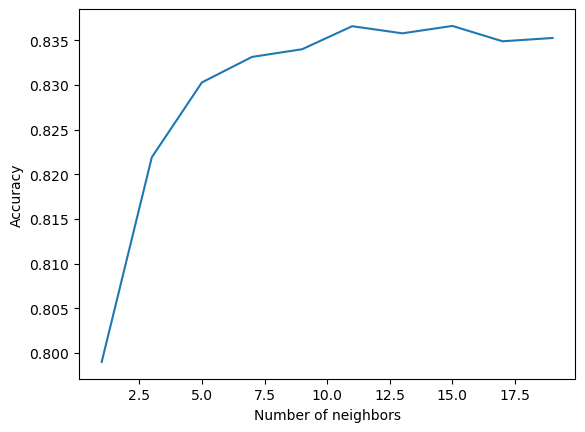

In [33]:
# Decision tree classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import time

# Determine the optimal k value
start=time.time()
k_values=[i for i in range(1,20,2)]
k_scores=[]
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    cv_scores=cross_val_score(knn, X_train1, y_train, cv=5, scoring='accuracy')
    k_scores.append(cv_scores.mean())
    
finish=time.time()
optimal=k_values[k_scores.index(max(k_scores))]
print('The optimal k value is {}'.format(optimal))
print("Time taken to find optimal k is", finish-start)
plt.plot(k_values, k_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [34]:
# Train the nearest-neighbor classification using euclidean distance

start=time.time()
knn1=KNeighborsClassifier(n_neighbors=15,metric='euclidean', weights='distance')
knn1=knn1.fit(X_train1,y_train)
finish=time.time()
y_pred1=knn1.predict(X_test1)

accuracy1=metrics.accuracy_score(y_test, y_pred1)
confusion_matrix1=confusion_matrix(y_test,y_pred1)

print("Time taken to train the model", finish-start)
print("Accuracy:",accuracy1)
print(confusion_matrix1)
print(classification_report(y_test,y_pred1))

Time taken to train the model 0.06098484992980957
Accuracy: 0.8379092193354216
[[11432  1003]
 [ 1636  2210]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.69      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.75      0.76     16281
weighted avg       0.83      0.84      0.83     16281



In [35]:
# Train the nearest-neighbor classification using manhattan distance
start=time.time()
knn2=KNeighborsClassifier(n_neighbors=15,metric='manhattan', weights='distance')
knn2=knn2.fit(X_train1,y_train)
finish=time.time()
y_pred2=knn2.predict(X_test1)

accuracy2=metrics.accuracy_score(y_test, y_pred2)
confusion_matrix2=confusion_matrix(y_test,y_pred2)

print("Time taken to train the model", finish-start)
print("Accuracy:",accuracy2)
print(confusion_matrix2)
print(classification_report(y_test,y_pred2))

Time taken to train the model 0.06085085868835449
Accuracy: 0.841041705054972
[[11478   957]
 [ 1631  2215]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12435
           1       0.70      0.58      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.84     16281



In [36]:
# Compute confidence interval for the accuracy
import scipy.stats

confidence=0.95
z_value=scipy.stats.norm.ppf((1+confidence)/2.0)
accuracy=max(accuracy1,accuracy2)
ci_length=z_value*np.sqrt((accuracy*(1-accuracy))/y_test.shape[0])
ci_lower=accuracy-ci_length
ci_upper=accuracy+ci_length

print(ci_lower, ci_upper)

0.8354253065296028 0.8466581035803412


# Compare performance

In [37]:
# Compare the performance of 2 models
n1=n2=16281
e1=(533+1897)/16281
e2=(957+1631)/16281

d=abs(e1-e2)

sigma2=((e1*(1-e1))/n1)+((e2*(1-e2))/n2)
confidence=0.95
z_value=scipy.stats.norm.ppf((1+confidence)/2.0)
ci_length=z_value*np.sqrt(sigma2)
ci_lower=d-ci_length
ci_upper=d+ci_length

print(ci_lower, ci_upper)

0.001862125705336587 0.017547001498152165
